# Project 4

[1]  Navn, etternavn, ID nummer,  

[2]  Navn, etternavn, ID nummer,

[3]  Roman Shevchuk Stetsyshyn, 284057.

## Abstract

## Introduction

## Topic 1 Unsupervised learning: Clustering the Milky Way

### Task 1: Milky Way image via MWSkyMap 

In the PDF and Pycharm file that was given to us, we are asked to generate and show an image of the Milky Way. However, this time the image has to be done with the function MWSkyMap, not MSFaceon as used in the file PyGaLaXy.ipynb. This means that the center and the images dimensions have to be decided based on program requirements, making the radius as maximum as possible, and creating the coordinates accordingly to the center of the Milky Way. [1] 

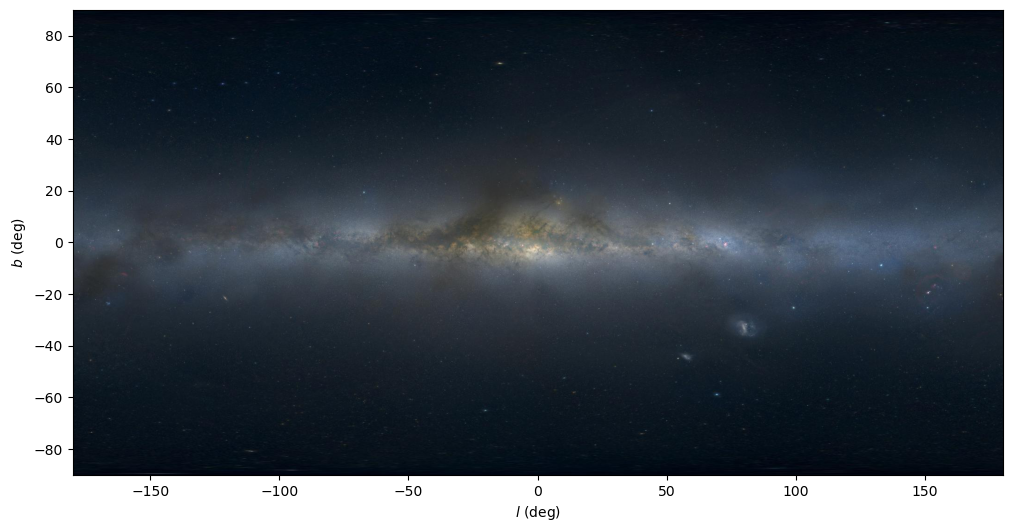

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from sklearn.cluster import KMeans
from mw_plot import MWSkyMap

mw = MWSkyMap(
    center =(0,0) * u.deg,
    radius = (180,90) *u.deg,
    grayscale = False,
    background = "CDS/P/Mellinger/color"
)

fig, ax = plt. subplots(figsize=(12,7))
mw.transform(ax)
plt.show()

### Task 2: 4 Milky Way sections 

In this task, the same function is used as it was beforehand (MWSkyMap). Nevertheless, this case is to demonstrate the opportunities to generate four different sectors of the Milky Way, having already the Andromeda Galaxy as an example. 

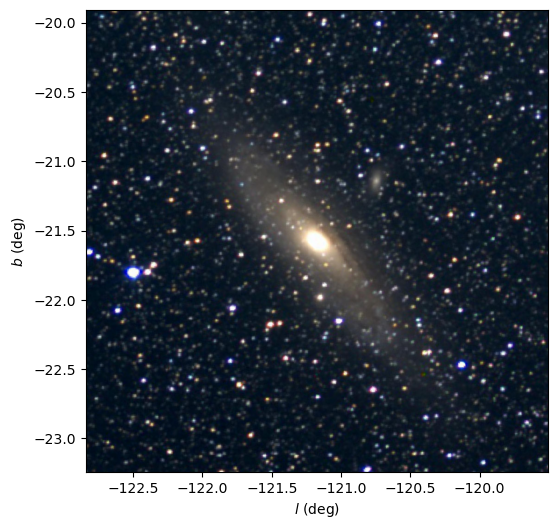

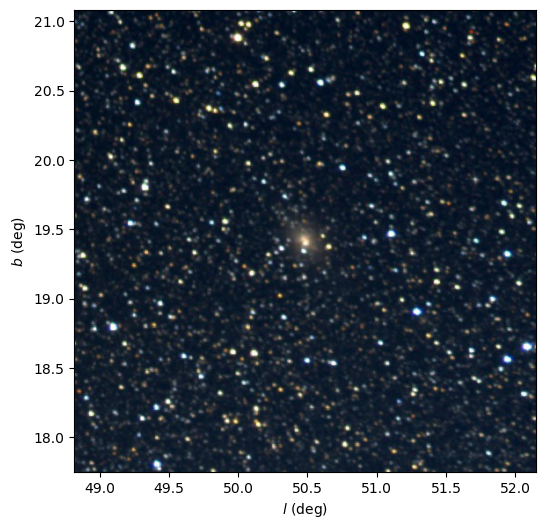

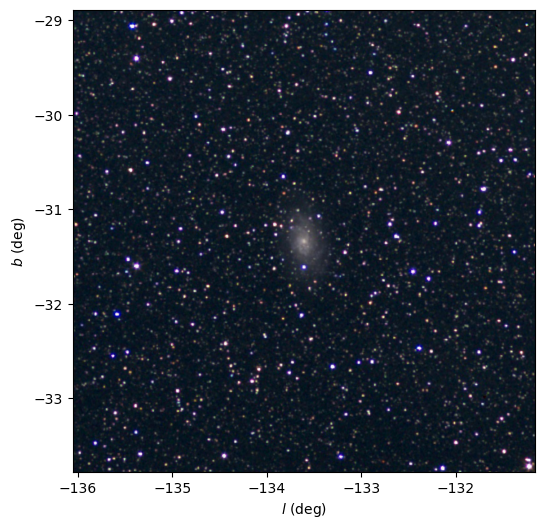

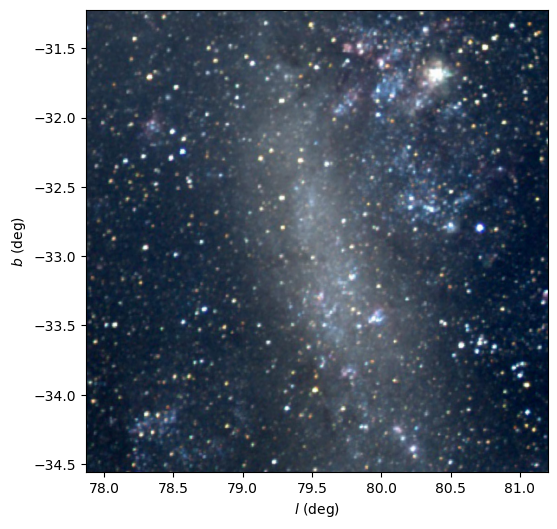

In [8]:
#Andromeda Galaxy (M31)

g1 = MWSkyMap(
    center ="M31",
    radius = (6000,6000) * u.arcsec,
    background = "Mellinger color optical survey",
)
fig1,ax1 = plt.subplots(figsize=(6,6))
g1.transform(ax1)

#only necessary image to save for later:
fig1.savefig("Andromeda",dpi=300)


# Centaurus A (NGC 5128)
g2 = MWSkyMap(
    center ="NGC 5128",
    radius = (6000,6000) * u.arcsec,
    background = "CDS/P/Mellinger/color",
)
fig2,ax2 = plt.subplots(figsize=(6,6))
g2.transform(ax2)

# Triangulum Galaxy (M33)
g3 = MWSkyMap(
    center ="M33",
    radius = (8800,8800) * u.arcsec,
    background = "CDS/P/Mellinger/color",
)
fig3,ax3 = plt.subplots(figsize=(6,6))
g3.transform(ax3)


# Large Magellanic Cloud
g4 = MWSkyMap(
    center ="LMC",
    radius = (6000,6000) * u.arcsec,
    background = "CDS/P/Mellinger/color",
)
fig4,ax4 = plt.subplots(figsize=(6,6))
g4.transform(ax4)

### Task 3 Conversion of images into RBG array

In order to make the image into an array of RBG we are to remove some "fat" from the image as also make it fit into the shape that we want to have, where it would be an array where the alpha channel or the fourth channel that determines the opacity of each pixel for a better quality and easier usage of the values [2]. Later they are also normalized from 0 to 1, in order to make an easier usage of the next function.

In [11]:
def figure_to_rgb_array(fig):
    
    #Remove the extra fat
    fig.subplots_adjust(left = 0, right = 1, top = 1, bottom = 0)
    fig.canvas.draw()

    #Get the dimensions
    w, h = fig.canvas.get_width_height()
    rgba = np.frombuffer(fig.canvas.buffer_rgba(),dtype=np.uint8)

    #Reshape and take off alpha
    rgb = rgba.reshape((h, w, 4))[:,:,:3]

    #normalize to 0-1 as it is easier to work with a small range
    return rgb/255.0
    

In [12]:
rgb_array = figure_to_rgb_array(fig)
plt.show()

#Proof
print (rgb_array.shape)

(700, 1200, 3)


### Task 4 Color Encoding task 3

The task itself is asking for the categorization of the most prominent pixels, and the visual patterns. So in the context of RGB, the bright stars can be white or yellowish, gas clouds or nebulas are red, pink, green and blue and the background is mostly black with some dust lines that are grey or dark grey.

In order to define what color each pixel should be in, it is divided into the color grading or color that would be most appropriate for the categories that are defined from before. The parameters are based on the 

In [14]:
def generate_color_categories(img_array):
    img = img_array.copy()
    h, w, _ = img.shape

    categories = {
        0:{"name":"Stars","rgb_range": [(0.85,1.0), (0.85, 1.0), (0.85, 1.0)]},
        1:{"name":"Red Nebula","rgb_range": [(0.6, 1.0), (0.0, 0.4), (0.0, 0.4)]},
        2:{"name":"Blue Nebula","rgb_range": [(0.0, 0.5), (0.5, 1.0), (0.7, 1.0)]},
        3:{"name":"Dust / Dark lanes","rgb_range": [(0.0, 0.3), (0.0, 0.2), (0.0, 0.2)]},
        4:{"name":"Background","rgb_range": [(0.0, 0.08), (0.0, 0.08), (0.0, 0.08)]},
        
    }

    category_map = np.full((h, w),-1)

    for cat_id, cat in categories.items():
        r_min, r_max = cat["rgb_range"][0]
        g_min, g_max = cat["rgb_range"][1]
        b_min, b_max = cat["rgb_range"][2]

        mask = (
            (img[:,:,0] >= r_min) & (img[:,:,0] <= r_max) &
            (img[:,:,1] >= g_min) & (img[:,:,1] <= g_max) &
            (img[:,:,2] >= b_min) & (img[:,:,2] <= b_max) 
        )
        category_map[mask] = cat_id

    return category_map

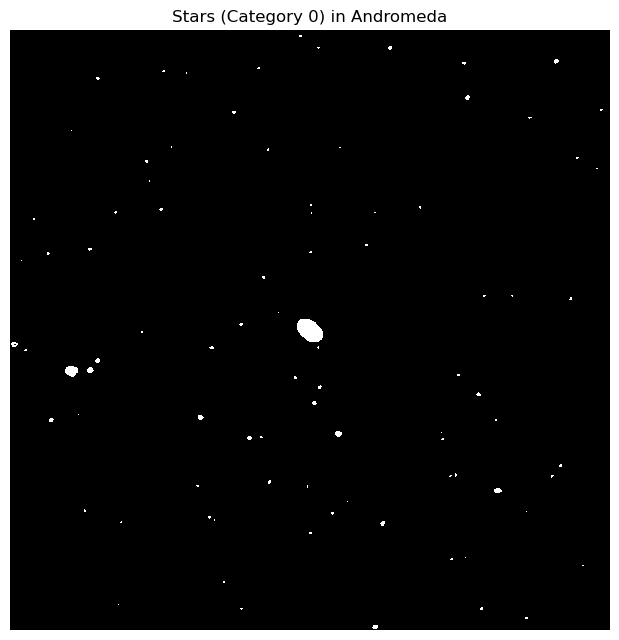

In [16]:
#Proof

g1 = MWSkyMap(
    center ="M31",
    radius = (6000,6000) * u.arcsec,
    background = "Mellinger color optical survey",
)
fig,ax = plt.subplots(figsize=(6,6))
g1.transform(ax)

img_array = figure_to_rgb_array(fig)

category_map = generate_color_categories (img_array)

stars_mask = (category_map == 0 )

plt.imshow(stars_mask, cmap="gray")
plt.axis("off")
plt.title("Stars (Category 0) in Andromeda")
plt.show()

### Topic 5 K-NN or K-Mean clustering

After reading and trying different types of clustering methods with the K- Nearest neighbor and the K-menaa, came to the realization that the KJ mean method embarcs a better understanding and usage of the clusters as it can also påossition them in the best way possible, reassembling the images in a better way than the K-NN method as it can be more freele in the decision of where to be inserted or plotted.[3][4] This is because of the usage of the KMeans, wher it looks for pixels that are not color category and claims them, so it can later write cluster labels back into the map.

In [23]:
# Cluster KMeans pixels ( KMeans)

def cluster_KMeans_pixels (img_array, category_map, n_clusters=5):
    img = img_array.copy()
    unassigned_mask = (category_map == -1 )
    clustered_map = category_map.copy()

    if np.any(unassigned_mask):
        pixels = img[unassigned_mask]
        kmeans = KMeans(n_clusters=n_clusters, random_state = 42)
        labels = kmeans.fit_predict(pixels)

        clustered_map[unassigned_mask]=labels+10
        return clustered_map, kmeans.cluster_centers_
    else:
        return category_map, None


### Task 6 & 7 Overimposed cluster with different categories. 

The form of clustering comes with its own difficult part, as it does not make a simple way. In an attempt to make it simple, there were many failures regarding the colors and the shape of the cluster, until I reached for external help using LLMS in order to find the bugs and the problem in my image.
The reason for this was the lack of the main image or the background that was necessary in order to make the overimposed cluster, that with the help of the rest of functions used beforehand, it made things simpler and easier, as after assigning cluster ID to the other clusters, the mapping of each sub-sampel pixel was done more precise in a new grid. [5]

In [34]:

def plot_clusters_overlay(img_array, cluster_map, cluster_centers=None, step=2, alpha=0.8):
    h, w, _ = img_array.shape 
    unique_clusters = np.unique(cluster_map)
    k = len(unique_clusters)

    #Map cluster IDs to indices 
    cluster_id_to_idx = {cid: i for i, cid in enumerate (unique_clusters)}

    #Build overlaying colors
    overlay_colors = np.zeros((k,3))
    for i, cl in enumerate (unique_clusters):
        if cluster_centers is None and cl >= 10:
            overlay_colors[i] = np.clip(cluster_centers[cl - 10], 0.0, 1.0)
        else:
            overlay_colors[i]= {
                0: np.array([1.0, 1.0, 1.0]), #Stars color
                1: np.array([1.0, 0.4, 0.4]), #Red Nebula color
                2: np.array([0.4, 0.6, 1.0]), #Blue Nebula
                3: np.array([0.0, 0.0, 0.0]), #Dust color
                4: np.array([0.0, 0.0, 0.0])  #Background color as dust
            }.get(cl, img_array[cluster_map == cl].mean(axis=0))

        #Build a grid to present the clusters overlay
        yy, xx = np.mgrid[0:h, 0:w]
        xx_s = xx[::step, ::step]
        yy_s = yy[::step, ::step]
        clusters_s = cluster_map[::step, ::step]

        indices_s = np.vectorize(lambda x:cluster_id_to_idx[x])(clusters_s)
        colors_s = overlay_colors[indices_s.flatten()]

        #Plot
        plt.figure(figsize = (8,8))
        plt.imshow(img_array)
        plt.scatter(xx_s, yy_s, c=colors_s,s=1, alpha=alpha)
        plt.axis("off")
        plt.show()

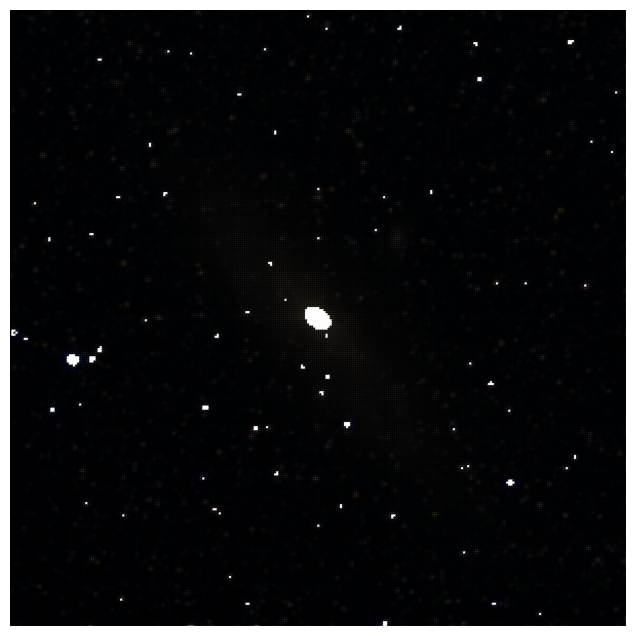

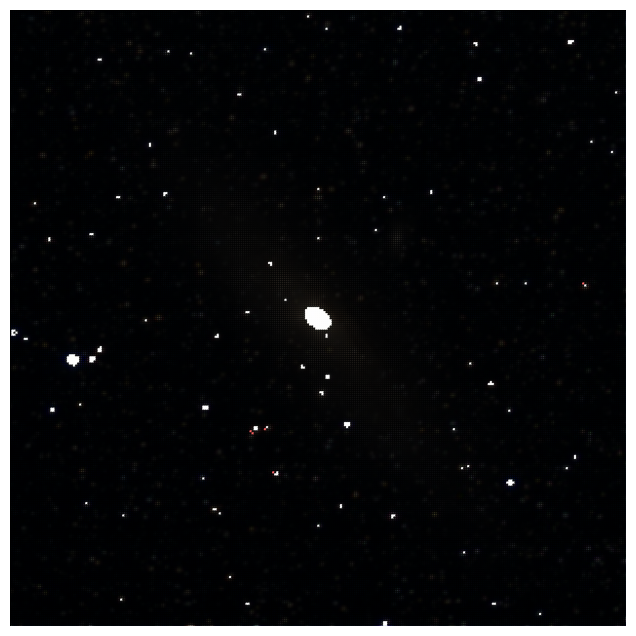

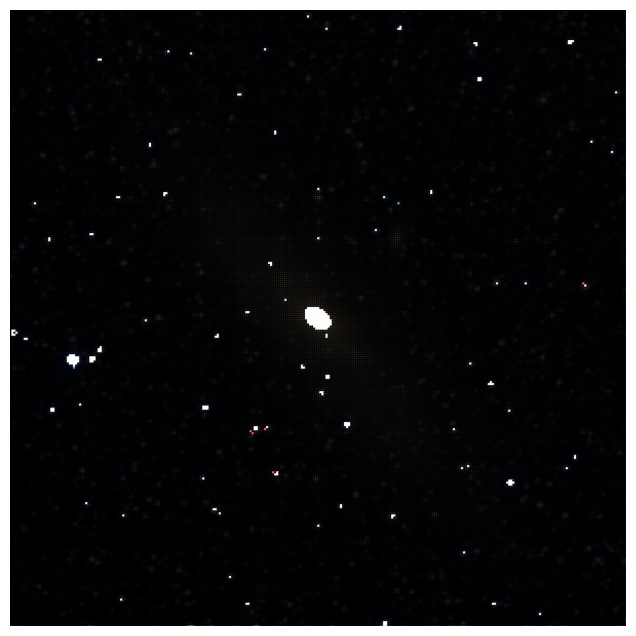

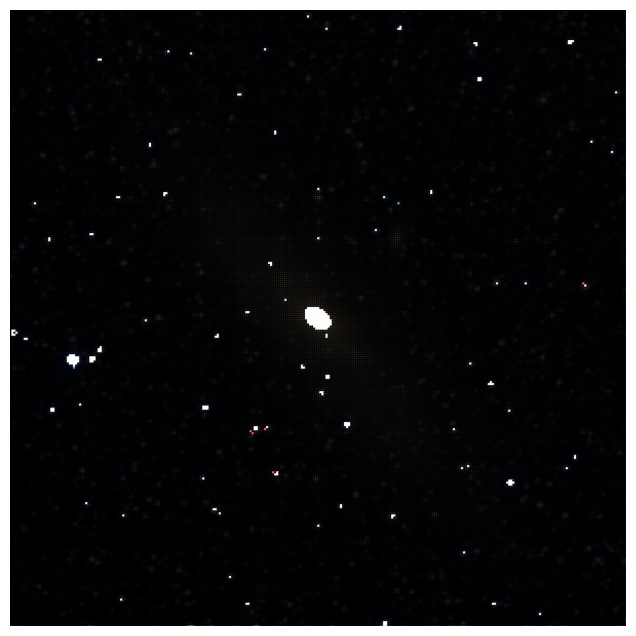

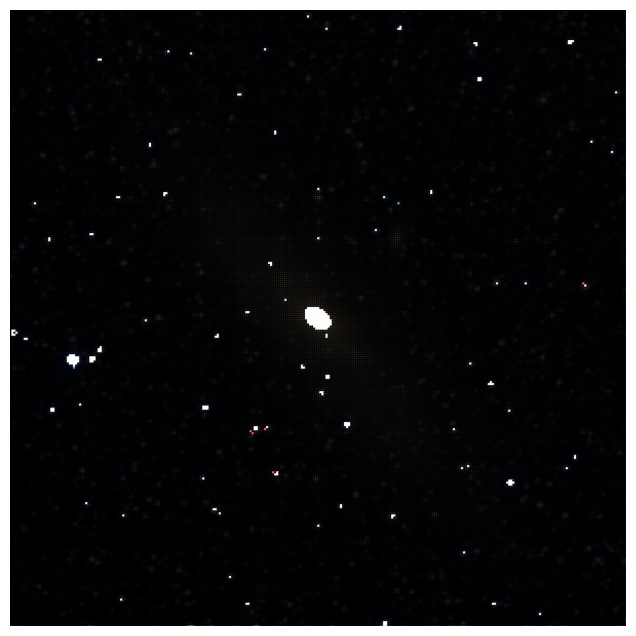

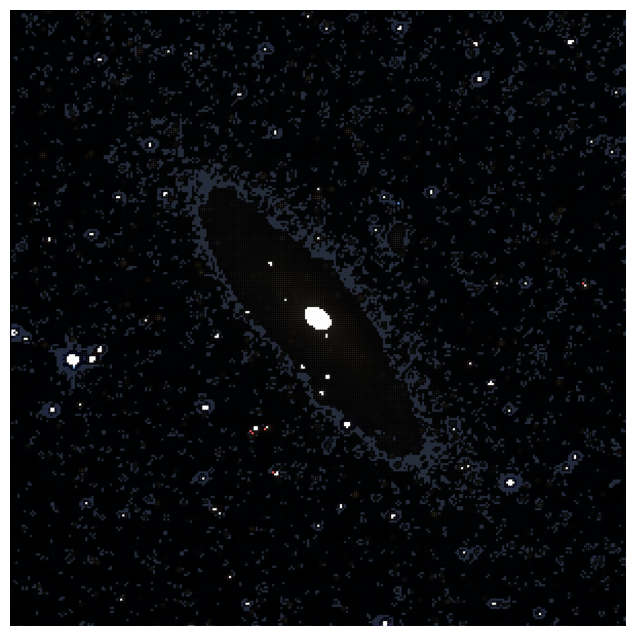

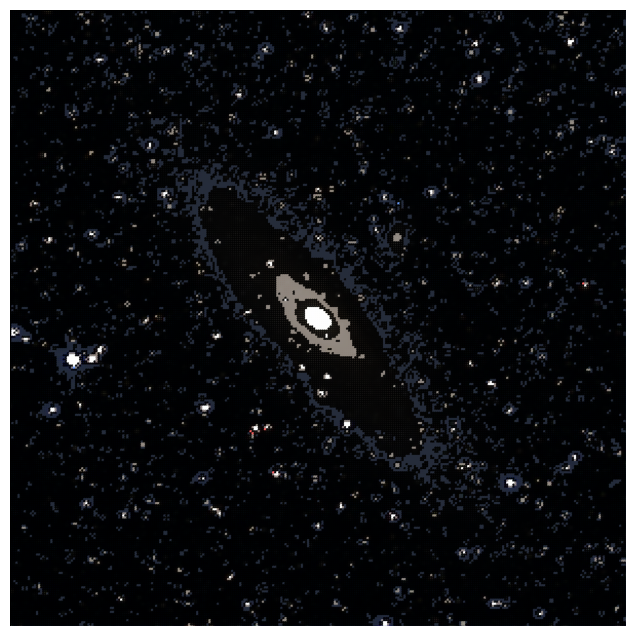

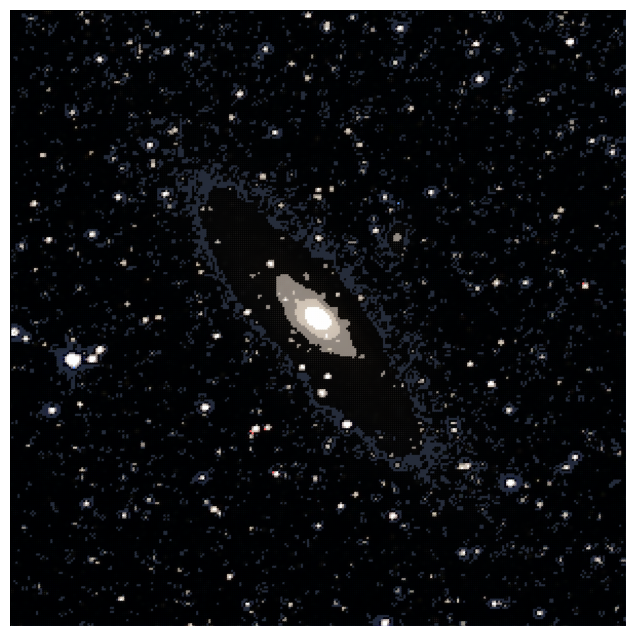

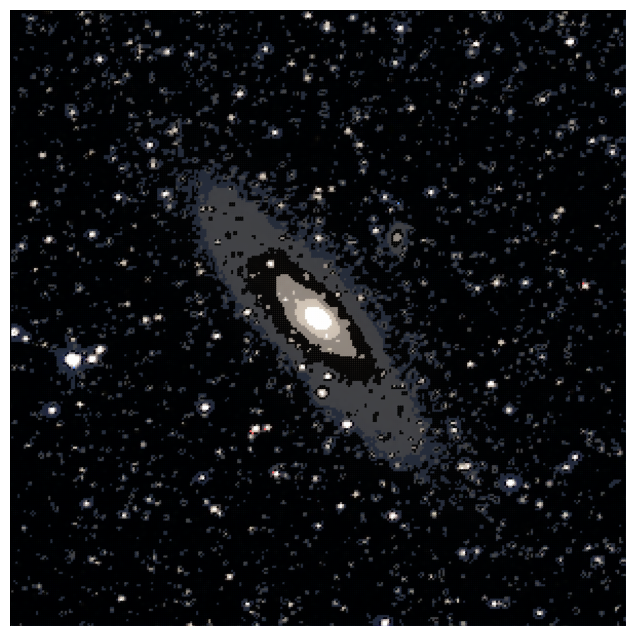

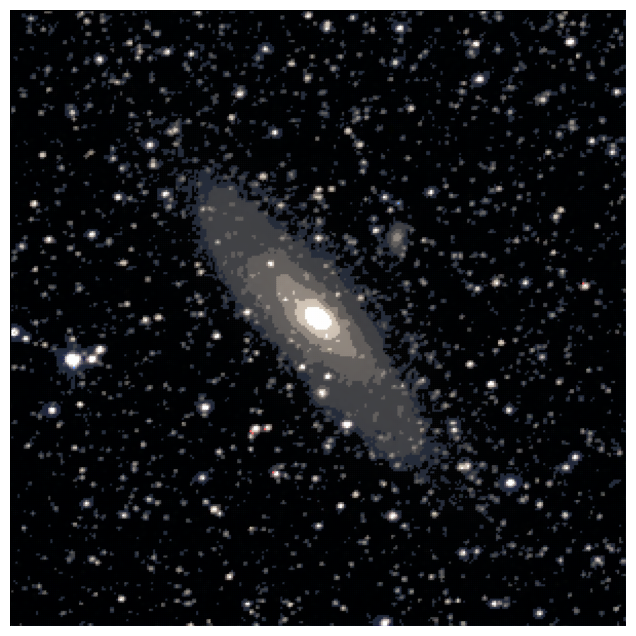

In [36]:
#Proof 

g1 = MWSkyMap(
    center= "M31",
    radius = (6000,6000) *u.arcsec,
    background = "Mellinger color optical survey",
)
fig,ax = plt.subplots(figsize =(6,6))
g1.transform(ax)
plt.close(fig)

img_array = figure_to_rgb_array(fig)
category_map = generate_color_categories (img_array)
cluster_map, centers = cluster_KMeans_pixels(img_array, category_map, n_clusters = 5)
plot_clusters_overlay(img_array, cluster_map, centers)

## Reflection

ROMAN: As for the first topic, I can say that the complexity of the exercise made it quite interesting that it did not overreach in difficulty, nor it was boring to the point of not being able to continue the exercise. It did take a fresh idea of image and cluster management as it also made an important point into the form of storage or how one could store images and also rearrange them depending on the color and the characteristics of each pixel. It also brough the impotrance of characteristics of each image and a new perspective to the way images are collected from space and stored in a program and then able to anaylize them through models. 

## Conclusion

ROMAN: In my opinion this exercise brought the "fun" and the newness of the universes touch into the exercise, as it also taught us the complexity and importance of the processing of cluster and how sometimes, simplicity is better than the vast amount that is served on a plate (as for the quantity of colors that can be design with RBG)

## References 

[1]«Welcome to mw-plot’s documentation! — mw-plot 0.14.0.dev0 documentation». Åpnet: 18. november 2025. [Online]. Tilgjengelig på: https://milkyway-plot.readthedocs.io/en/latest/index.html

[2]«Alpha compositing», Wikipedia. 17. november 2025. Åpnet: 18. november 2025. [Online]. Tilgjengelig på: https://en.wikipedia.org/w/index.php?title=Alpha_compositing&oldid=1322741747

[3] H.-S. Park og C.-H. Jun, «A simple and fast algorithm for K-medoids clustering», Expert Systems with Applications, bd. 36, nr. 2, Part 2, s. 3336–3341, mar. 2009, doi: 10.1016/j.eswa.2008.01.039.

[4]«k-nearest neighbors algorithm», Wikipedia. 10. september 2025. Åpnet: 18. november 2025. [Online]. Tilgjengelig på: https://en.wikipedia.org/w/index.php?title=K-nearest_neighbors_algorithm&oldid=1310572110

[5]«Cluster analysis», Wikipedia. 16. november 2025. Åpnet: 18. november 2025. [Online]. Tilgjengelig på: https://en.wikipedia.org/w/index.php?title=Cluster_analysis&oldid=1322471715